In [1]:
#%matplotlib notebook
import numpy as np
import math
import scipy
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.ticker as mtick
from ipywidgets import interact
import pandas as pd
import seaborn as sns
import os
from os import listdir, path
import glob
import tkinter as tk
from tkinter.filedialog import askopenfilename

In [2]:
def load_data():
    root = tk.Tk()
    root.withdraw() #Prevents the Tkinter window to come up
    samplepath = askopenfilename(multiple=True)
    root.destroy()
    listpath = list(samplepath)
    return listpath


In [3]:
list_path = load_data()

plus_df = pd.read_csv(list_path[0])

In [4]:
plus_df

,timestamp,age,sex,relationship_status,occupation,affiliated_organization,social_media_user,common_platforms_used,avg_hours_spent_daily,frequency_use_without_purpose,...,company,goverment,age_group,age_group_ordinal,adhd,anxiety,self_esteem_issues,depression,total_avg_score,has_issues
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,1,"['Facebook', 'Twitter', 'Instagram', 'YouTube'...",3,5,...,0,0,young,1,4.50,2.0,2.333333,4.666667,3.375000,0
1,2022-04-18 19:19:28,21,Female,Single,University Student,University,1,"['Facebook', 'Twitter', 'Instagram', 'YouTube'...",6,4,...,0,0,young,1,3.75,3.5,3.666667,4.666667,3.895833,1
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,1,"['Facebook', 'Instagram', 'YouTube', 'Pinterest']",4,3,...,0,0,young,1,2.75,3.0,2.333333,3.666667,2.937500,0
3,2022-04-18 19:29:43,21,Female,Single,University Student,University,1,"['Facebook', 'Instagram']",6,4,...,0,0,young,1,3.00,3.0,4.000000,3.000000,3.250000,0
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,1,"['Facebook', 'Instagram', 'YouTube']",3,3,...,0,0,young,1,4.25,4.5,3.000000,3.000000,3.687500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2022-05-21 23:38:28,24,Male,Single,Salaried Worker,"University, Private",1,"['Facebook', 'Instagram', 'YouTube']",3,3,...,0,0,young,1,3.75,3.0,4.000000,3.666667,3.604167,1
477,2022-05-22 00:01:05,26,Female,Married,Salaried Worker,University,1,"['Facebook', 'YouTube']",2,2,...,0,0,young,1,2.50,3.0,4.000000,3.000000,3.125000,0
478,2022-05-22 10:29:21,29,Female,Married,Salaried Worker,University,1,"['Facebook', 'YouTube']",3,3,...,0,0,young,1,3.00,3.0,3.333333,2.000000,2.833333,0
479,2022-07-14 19:33:47,21,Male,Single,University Student,University,1,"['Facebook', 'Twitter', 'Instagram', 'YouTube'...",3,2,...,0,0,young,1,2.50,2.5,3.000000,4.333333,3.083333,0


array([<Axes: ylabel='avg_hours_spent_daily'>,
       <Axes: ylabel='frequency_use_without_purpose'>,
       <Axes: ylabel='anxiety'>, <Axes: ylabel='self_esteem_issues'>],
      dtype=object)

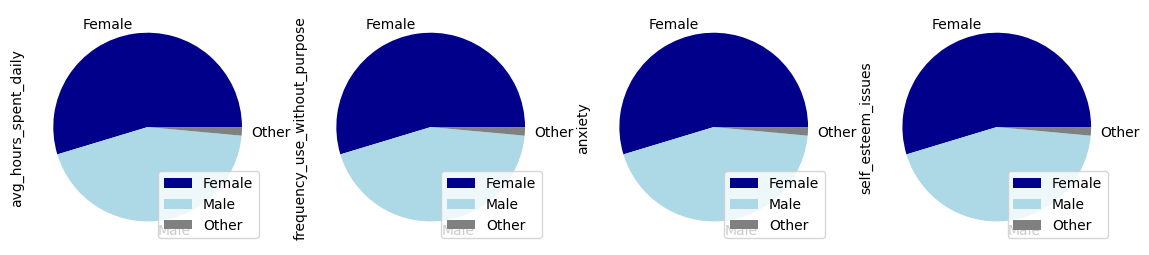

In [12]:
plus_list = list(plus_df.columns.values)
test_pd = plus_df.groupby(['sex'])[['avg_hours_spent_daily', 'frequency_use_without_purpose', 'anxiety', 'self_esteem_issues']].count()
test_pd
#test_pd.plot.bar(stacked = True, figsize = (9,5))
colors = ['darkblue', 'lightblue', 'grey']
test_pd.plot.pie(subplots = True, colors = colors, figsize = (14,5))

array([<Axes: ylabel='avg_hours_spent_daily'>,
       <Axes: ylabel='frequency_use_without_purpose'>,
       <Axes: ylabel='anxiety'>, <Axes: ylabel='self_esteem_issues'>],
      dtype=object)

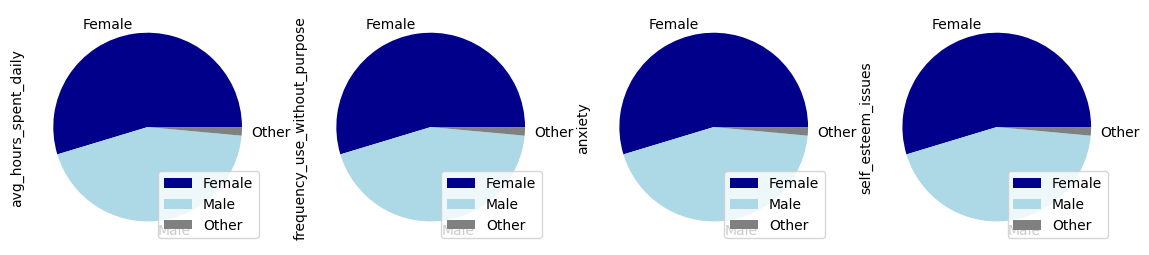

In [6]:
test_pd = plus_df.groupby(['sex'])[['avg_hours_spent_daily', 'frequency_use_without_purpose', 'anxiety', 'self_esteem_issues']].count()
colors = ['darkblue', 'lightblue', 'grey']
test_pd.plot.pie(subplots = True, colors = colors, figsize = (14,5))

<Axes: xlabel='avg_hours_spent_daily'>

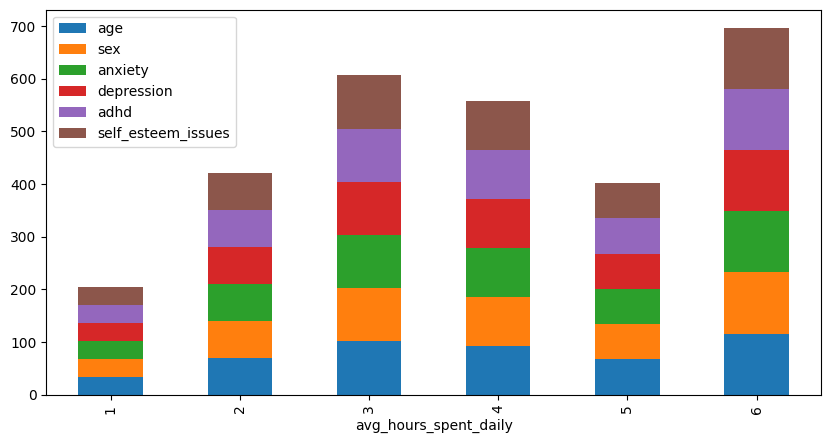

In [7]:
test_pd = plus_df.groupby([plus_list[8]])[['age', 'sex', 'anxiety', 'depression', 'adhd', 'self_esteem_issues']].count()
colors = ['darkblue', 'lightblue', 'grey']
test_pd.plot.bar(stacked=True, figsize=(10, 5))

<Axes: xlabel='anxiety'>

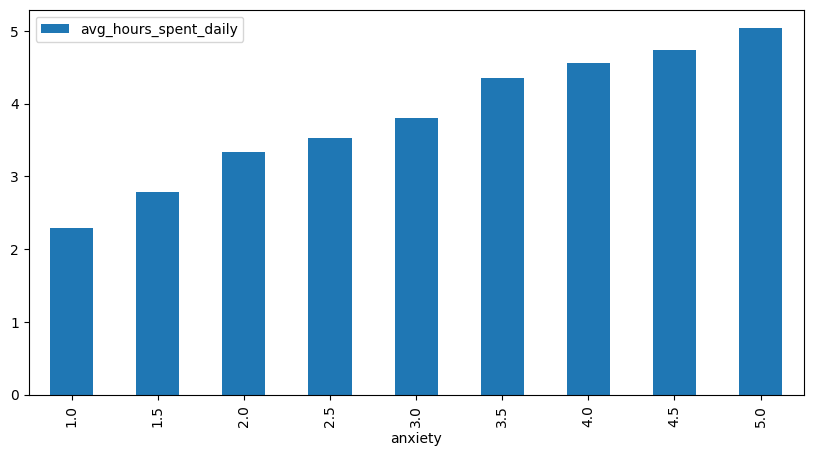

In [8]:
test_pd = plus_df.groupby(['anxiety'])[[plus_list[8]]].mean()
test_pd.plot.bar(figsize=(10, 5))

<Axes: xlabel='depression'>

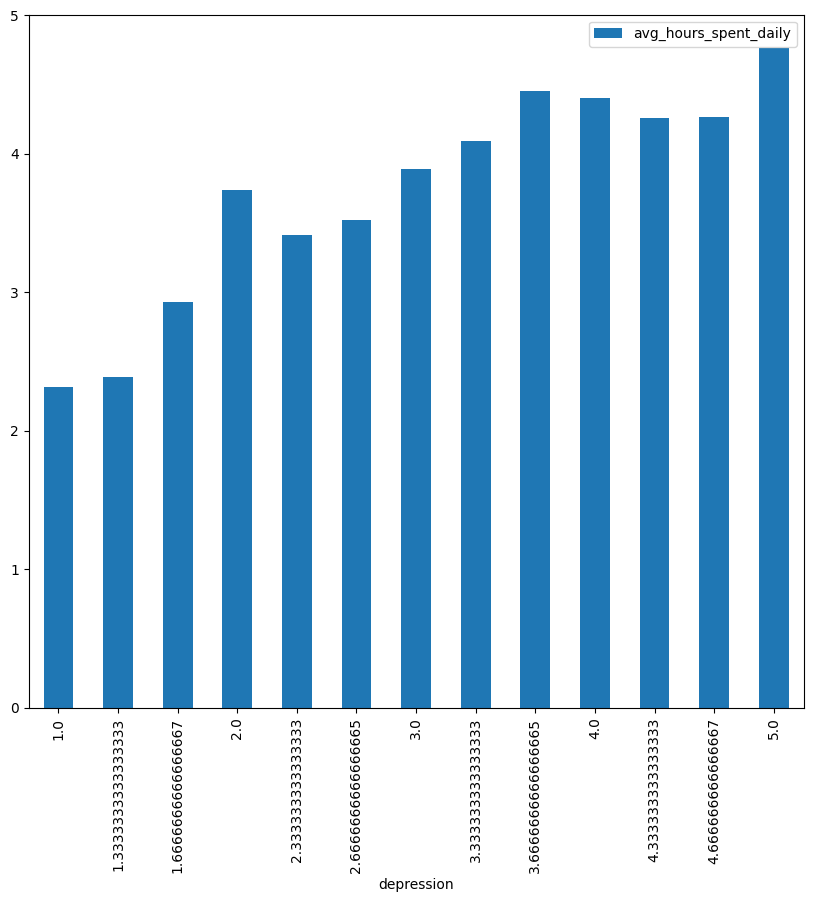

In [9]:
test_pd = plus_df.groupby(['depression'])[[plus_list[8]]].mean()
test_pd.plot.bar(figsize=(10, 9))

<Axes: xlabel='adhd'>

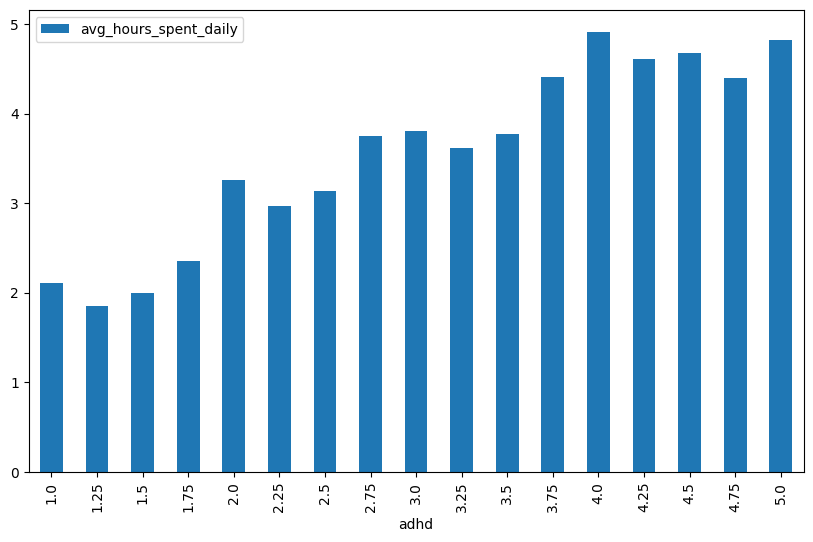

In [10]:
test_pd = plus_df.groupby(['adhd'])[[plus_list[8]]].mean()
test_pd.plot.bar(figsize=(10, 6))

<Axes: xlabel='self_esteem_issues'>

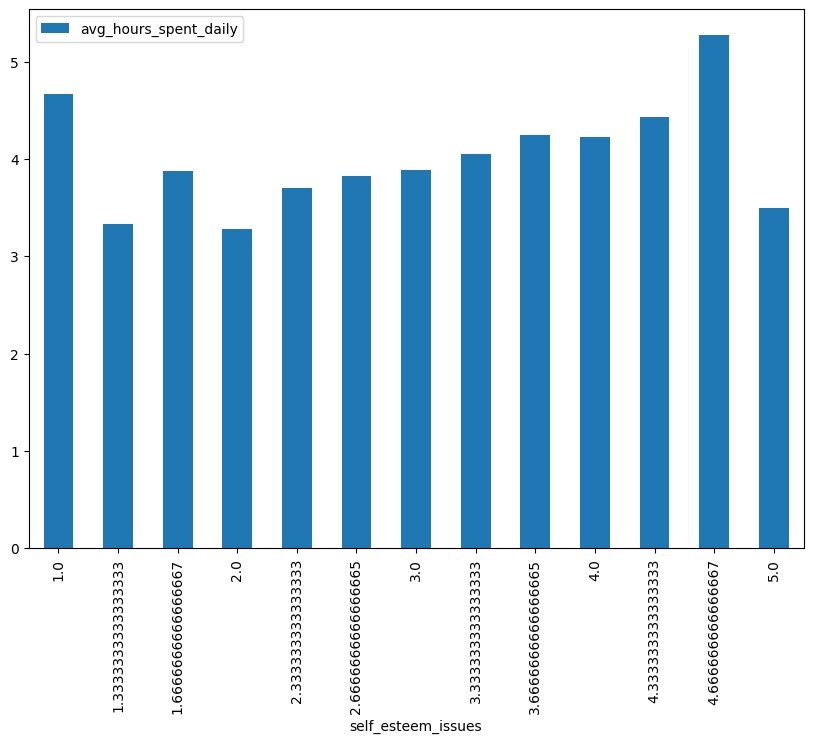

In [11]:
test_pd = plus_df.groupby(['self_esteem_issues'])[[plus_list[8]]].mean()
test_pd.plot.bar(figsize=(10, 7))